In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Phase 1 : Cleaning

### 1 )      Read the labelled data from respective folders (pos & neg) and store in data-frames                   (eg: train_df & test_df) with suitable structure

In [2]:
# training dataset

import glob
from collections import defaultdict
from pathlib import Path
paths=glob.glob(r"C:\Users\sony\Desktop\python\aclImdb\train\pos/*.txt")
paths
results = defaultdict(list)
for path in paths:
    with open(path,encoding="utf-8") as topo_file:
        results["review"].append(topo_file.read())

df1=pd.DataFrame(results) 
df1["label"]="pos"
df1.head()


,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,pos
1,Homelessness (or Houselessness as George Carli...,pos
2,Brilliant over-acting by Lesley Ann Warren. Be...,pos
3,This is easily the most underrated film inn th...,pos
4,This is not the typical Mel Brooks film. It wa...,pos


In [3]:
paths=glob.glob(r"C:\Users\sony\Desktop\python\aclImdb\train\neg/*.txt")
paths
results = defaultdict(list)
for path in paths:
    with open(path,"r",encoding="utf-8") as topo_file:
        results["review"].append(topo_file.read())
        
df2=pd.DataFrame(results) 
df2["label"]="neg"
df2.head()

,review,label
0,Story of a man who has unnatural feelings for ...,neg
1,Airport '77 starts as a brand new luxury 747 p...,neg
2,This film lacked something I couldn't put my f...,neg
3,"Sorry everyone,,, I know this is supposed to b...",neg
4,When I was little my parents took me along to ...,neg


In [4]:
train_df=pd.concat([df1,df2],axis=0).reset_index(drop=True)
train_df.head()

,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,pos
1,Homelessness (or Houselessness as George Carli...,pos
2,Brilliant over-acting by Lesley Ann Warren. Be...,pos
3,This is easily the most underrated film inn th...,pos
4,This is not the typical Mel Brooks film. It wa...,pos


In [5]:
# testing dataset

paths=glob.glob(r"C:\Users\sony\Desktop\python\aclImdb\test\pos/*.txt")
paths
results = defaultdict(list)
for path in paths:
    with open(path,encoding="utf-8") as topo_file:
        results["review"].append(topo_file.read())
        
          
df3=pd.DataFrame(results) 
df3["label"]="pos"
df3.head()

,review,label
0,I went and saw this movie last night after bei...,pos
1,Actor turned director Bill Paxton follows up h...,pos
2,As a recreational golfer with some knowledge o...,pos
3,"I saw this film in a sneak preview, and it is ...",pos
4,Bill Paxton has taken the true story of the 19...,pos


In [6]:
paths=glob.glob(r"C:\Users\sony\Desktop\python\aclImdb\test\neg/*.txt")
paths
results = defaultdict(list)
for path in paths:
    with open(path,encoding="utf-8") as topo_file:
        results["review"].append(topo_file.read())
          
df4=pd.DataFrame(results) 
df4["label"]="neg"
df4.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [7]:
test_df=pd.concat([df3,df4],axis=0).reset_index(drop=True)
test_df.head()

,review,label
0,I went and saw this movie last night after bei...,pos
1,Actor turned director Bill Paxton follows up h...,pos
2,As a recreational golfer with some knowledge o...,pos
3,"I saw this film in a sneak preview, and it is ...",pos
4,Bill Paxton has taken the true story of the 19...,pos


### 2)     Remove stop words from the data

In [8]:
import nltk
from nltk.corpus import stopwords
import string
stopword_list=nltk.corpus.stopwords.words('english')
stop=set(stopwords.words('english'))
print(stop)


{'needn', 'through', "it's", 'mustn', "wasn't", 'have', 'over', 'above', 'himself', 'then', 'only', 'wasn', 'o', 't', 'is', 'not', 'who', 'them', 'y', 'after', 'herself', 'doing', 'shouldn', 'myself', "she's", 'she', 'against', 'down', 'further', 'where', 'been', 'mightn', 'do', "aren't", 're', 'which', 'because', 'he', "isn't", 'while', 'couldn', "wouldn't", 'our', 'themselves', 'her', 'how', 'up', 'now', 'were', "you're", 'or', "you'd", 'more', 'before', 'than', 'so', 'of', 'and', 'theirs', 'yours', 've', 'will', 'what', 'be', 'aren', 'are', 'these', 'between', "didn't", 'nor', 'whom', 'ours', "you'll", 'both', 'i', 'ain', 'no', 'am', "don't", 'you', 'just', 'but', "haven't", 'doesn', "mightn't", "that'll", 'here', 'any', 'again', 'on', 'most', 'his', 'until', 'a', 'from', 'should', 'below', 'does', 'won', 'ourselves', 'such', "shan't", 'him', 'they', 'shan', 'at', "hasn't", 'my', 'for', 'once', "mustn't", 'haven', 'own', "you've", 'd', "couldn't", 'its', 'under', 'few', 'their', 'th

In [9]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [10]:
train_df['review']=train_df['review'].apply(remove_stopwords)
train_df.head()

,review,label
0,Bromwell High cartoon comedy. ran time program...,pos
1,Homelessness ( Houselessness George Carlin sta...,pos
2,Brilliant over-acting Lesley Ann Warren. Best ...,pos
3,easily underrated film inn Brooks cannon. Sure...,pos
4,typical Mel Brooks film. much less slapstick m...,pos


In [11]:
test_df['review']=test_df['review'].apply(remove_stopwords)
test_df.head()

,review,label
0,went saw movie last night coaxed friends mine....,pos
1,Actor turned director Bill Paxton follows prom...,pos
2,recreational golfer knowledge sport ' history ...,pos
3,"saw film sneak preview , delightful. cinematog...",pos
4,Bill Paxton taken true story 1913 US golf open...,pos


###  3)    Removing punctuations, HTML tags (like br) etc.

In [12]:
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    return text

In [13]:
train_df['review']=train_df['review'].apply(denoise_text)
train_df.head()

,review,label
0,Bromwell High cartoon comedy. ran time program...,pos
1,Homelessness ( Houselessness George Carlin sta...,pos
2,Brilliant over-acting Lesley Ann Warren. Best ...,pos
3,easily underrated film inn Brooks cannon. Sure...,pos
4,typical Mel Brooks film. much less slapstick m...,pos


In [14]:
test_df['review']=test_df['review'].apply(denoise_text)
test_df.head()

,review,label
0,went saw movie last night coaxed friends mine....,pos
1,Actor turned director Bill Paxton follows prom...,pos
2,recreational golfer knowledge sport ' history ...,pos
3,"saw film sneak preview , delightful. cinematog...",pos
4,Bill Paxton taken true story 1913 US golf open...,pos


In [15]:
# removing special characters

import re
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z\s]'
    text=re.sub(pattern,' ',text)
    return text

In [16]:
train_df['review']=train_df['review'].apply(remove_special_characters)
train_df.head()

,review,label
0,Bromwell High cartoon comedy ran time program...,pos
1,Homelessness Houselessness George Carlin sta...,pos
2,Brilliant over acting Lesley Ann Warren Best ...,pos
3,easily underrated film inn Brooks cannon Sure...,pos
4,typical Mel Brooks film much less slapstick m...,pos


In [17]:
test_df['review']=test_df['review'].apply(remove_special_characters)
test_df.head()

,review,label
0,went saw movie last night coaxed friends mine ...,pos
1,Actor turned director Bill Paxton follows prom...,pos
2,recreational golfer knowledge sport history ...,pos
3,saw film sneak preview delightful cinematog...,pos
4,Bill Paxton taken true story US golf open...,pos


In [18]:
def remove_common_words(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in freq]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [19]:
#removing most common words
freq = pd.Series(' '.join(train_df['review']).split()).value_counts()[:10]
freq

movie     43348
film      39677
one       24410
like      19496
good      14489
time      12435
would     12307
story     11562
really    11336
see       11098
dtype: int64

In [20]:
freq = list(freq.index)

train_df['review'] = train_df['review'].apply(remove_common_words)
train_df.head()

,review,label
0,Bromwell High cartoon comedy ran programs scho...,pos
1,Homelessness Houselessness George Carlin state...,pos
2,Brilliant over acting Lesley Ann Warren Best d...,pos
3,easily underrated inn Brooks cannon Sure flawe...,pos
4,typical Mel Brooks much less slapstick movies ...,pos


In [21]:
freq = pd.Series(' '.join(test_df['review']).split()).value_counts()[:10]
freq


movie     43229
film      38983
one       24333
like      19142
good      14028
time      12103
would     12017
see       11137
really    10993
story     10808
dtype: int64

In [22]:
freq = list(freq.index)
test_df['review'] = test_df['review'].apply(remove_common_words)
test_df.head()

,review,label
0,went saw last night coaxed friends mine admit ...,pos
1,Actor turned director Bill Paxton follows prom...,pos
2,recreational golfer knowledge sport history pl...,pos
3,saw sneak preview delightful cinematography un...,pos
4,Bill Paxton taken true US golf open made much ...,pos


### 4)    Apply Stemming and Lemmatization

In [23]:
from nltk.stem.wordnet import WordNetLemmatizer
def simple_lemmatizer(text):
    lemmatizer=WordNetLemmatizer()
    text= ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text.lower()

In [24]:
train_df['review']=train_df['review'].apply(simple_lemmatizer)
train_df.head()

,review,label
0,bromwell high cartoon comedy ran program schoo...,pos
1,homelessness houselessness george carlin state...,pos
2,brilliant over acting lesley ann warren best d...,pos
3,easily underrated inn brooks cannon sure flawe...,pos
4,typical mel brooks much le slapstick movie act...,pos


In [25]:
test_df['review']=test_df['review'].apply(simple_lemmatizer)
test_df.head()

,review,label
0,went saw last night coaxed friend mine admit r...,pos
1,actor turned director bill paxton follows prom...,pos
2,recreational golfer knowledge sport history pl...,pos
3,saw sneak preview delightful cinematography un...,pos
4,bill paxton taken true us golf open made much ...,pos


# Phase 2 : Exploration

###  1) For labelled data, find the most common words associated with each category (positive & negative)

In [26]:
from collections import Counter
pos_train_words=Counter(" ".join(train_df[:12500]["review"]).split()).most_common(10)
print("Top 10 positive words and their respective counts in training data:\n\n",pos_train_words)

Top 10 positive words and their respective counts in training data:

 [('character', 7025), ('great', 6434), ('well', 6411), ('get', 5756), ('make', 5667), ('also', 5550), ('life', 5088), ('scene', 4971), ('even', 4962), ('show', 4863)]


In [27]:
neg_train_words=Counter(" ".join(train_df[12500:]["review"]).split()).most_common(10)
print("Top 10 negative words and their respective counts in trainig data:\n\n",neg_train_words)

Top 10 negative words and their respective counts in trainig data:

 [('even', 7684), ('bad', 7394), ('character', 7042), ('get', 6741), ('make', 6511), ('scene', 5562), ('much', 5077), ('people', 4838), ('could', 4685), ('thing', 4606)]


In [28]:
pos_test_words=Counter(" ".join(test_df[:12500]["review"]).split()).most_common(10)
print("Top 10 positive words and their respective counts in testing data:\n\n",pos_test_words)

Top 10 positive words and their respective counts in testing data:

 [('character', 6911), ('great', 6574), ('well', 6319), ('make', 5535), ('get', 5413), ('also', 5242), ('scene', 5045), ('show', 4769), ('life', 4755), ('even', 4651)]


In [29]:
neg_test_words=Counter(" ".join(test_df[12500:]["review"]).split()).most_common(10)
print("Top 10 negative words and their respective counts in testing data:\n\n",neg_test_words)

Top 10 negative words and their respective counts in testing data:

 [('even', 7560), ('bad', 7320), ('character', 7156), ('get', 6698), ('make', 6391), ('scene', 5746), ('much', 5038), ('people', 4696), ('thing', 4676), ('could', 4615)]


### 2) Discover the lowest frequency and highest frequency words

In [30]:
#training set

train_word_counts=Counter(" ".join(train_df["review"]).split())
train_word_counts
sorted_train_counts = pd.DataFrame(sorted(train_word_counts.items(), key=lambda x: x[1]))
sorted_train_counts.columns=["word","wordcount"]
sorted_train_counts[sorted_train_counts.wordcount==sorted_train_counts.wordcount.min()].head()

,word,wordcount
0,houselessness,1
1,fumes,1
2,dispersion,1
3,godby,1
4,maupins,1


In [31]:
sorted_train_counts[sorted_train_counts.wordcount==sorted_train_counts.wordcount.max()]

,word,wordcount
69267,character,14067


In [32]:
#testing set

test_word_counts=Counter(" ".join(test_df["review"]).split())
test_word_counts
sorted_test_counts = pd.DataFrame(sorted(test_word_counts.items(), key=lambda x: x[1]))
sorted_test_counts.columns=["word","wordcount"]
sorted_test_counts[sorted_test_counts.wordcount==sorted_test_counts.wordcount.min()].head()

,word,wordcount
0,bristish,1
1,fairway,1
2,outstretching,1
3,zuotian,1
4,ordained,1


In [33]:
sorted_test_counts[sorted_test_counts.wordcount==sorted_test_counts.wordcount.max()]

,word,wordcount
68547,character,14067


# Phase 3: Visualization 

### 1) Create a word cloud with positive and negative words after cleansing

<function matplotlib.pyplot.show(*args, **kw)>

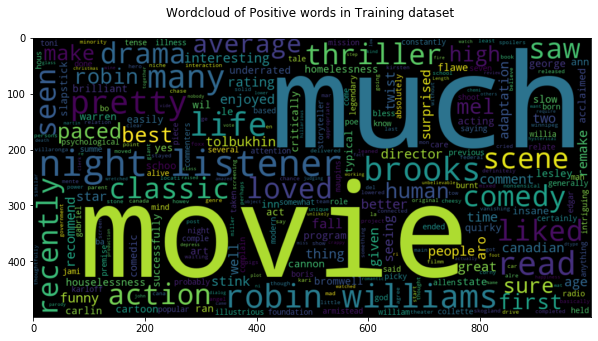

In [34]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(10,10))
positive_text=train_df[:12500]["review"]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5,stopwords=STOPWORDS)
positive_words=WC.generate(str(positive_text))
plt.imshow(positive_words,interpolation='bilinear')
plt.title("Wordcloud of Positive words in Training dataset \n")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

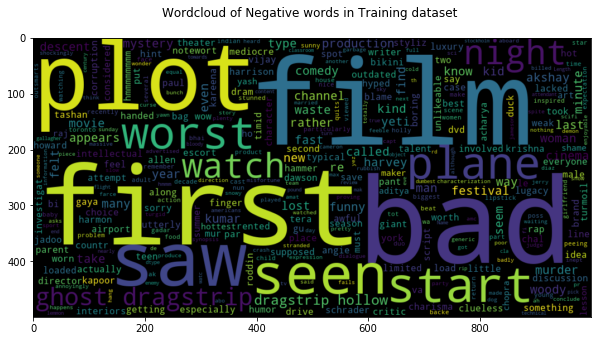

In [35]:
plt.figure(figsize=(10,10))
negative_text=train_df[12501:]["review"]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5,stopwords=STOPWORDS)
negative_words=WC.generate(str(negative_text))
plt.imshow(negative_words,interpolation='bilinear')
plt.title("Wordcloud of Negative words in Training dataset \n")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

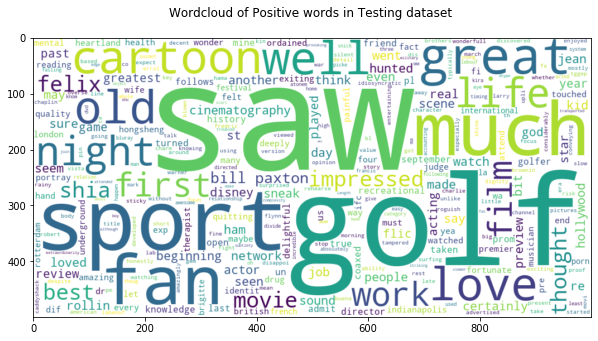

In [36]:
plt.figure(figsize=(10,10))
positive_text=test_df[:12500]["review"]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5,stopwords=STOPWORDS,background_color="white")
positive_words=WC.generate(str(positive_text))
plt.imshow(positive_words,interpolation='bilinear')
plt.title("Wordcloud of Positive words in Testing dataset \n")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

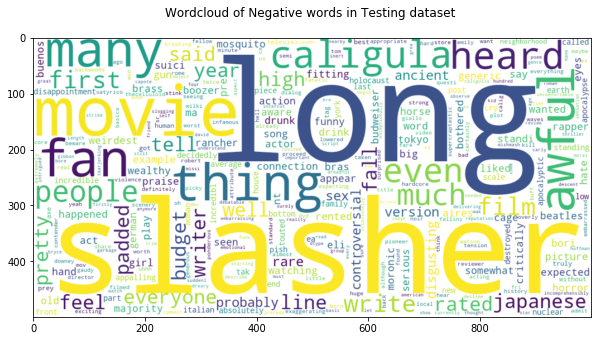

In [37]:
plt.figure(figsize=(10,10))
negative_text=test_df[12501:]["review"]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5,stopwords=STOPWORDS,background_color="white")
negative_words=WC.generate(str(negative_text))
plt.imshow(negative_words,interpolation='bilinear')
plt.title("Wordcloud of Negative words in Testing dataset \n")
plt.show


### 2) Visualise the positive and negative words distribution (Hint: Histogram)

Text(0.5, 1.0, 'distribution of top 50 postive words in training data')

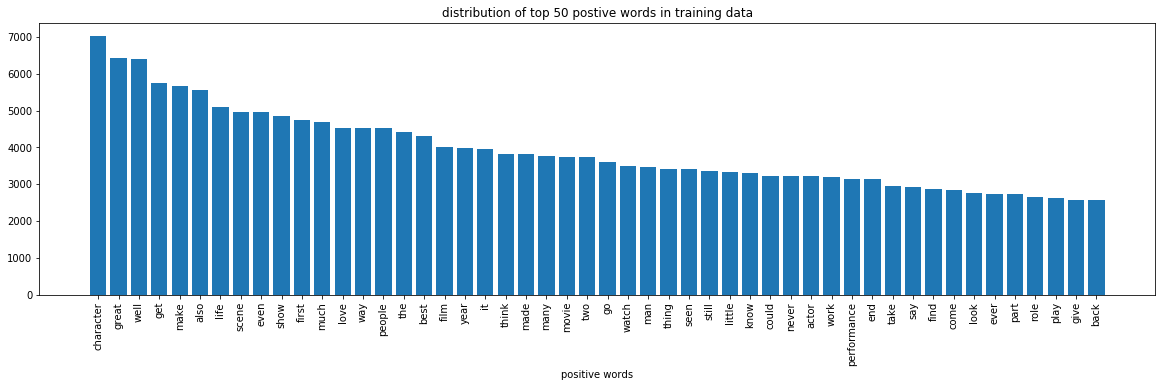

In [38]:
top50_pos_words=pd.DataFrame(Counter(" ".join(train_df[:12500]["review"]).split()).most_common(50))
plt.figure(figsize=(20,5))
plt.bar(top50_pos_words[0],top50_pos_words[1])
plt.xlabel("positive words")
plt.xticks(rotation="vertical")
plt.title("distribution of top 50 postive words in training data")

Text(0.5, 1.0, 'distribution of top 50 negative words in training data')

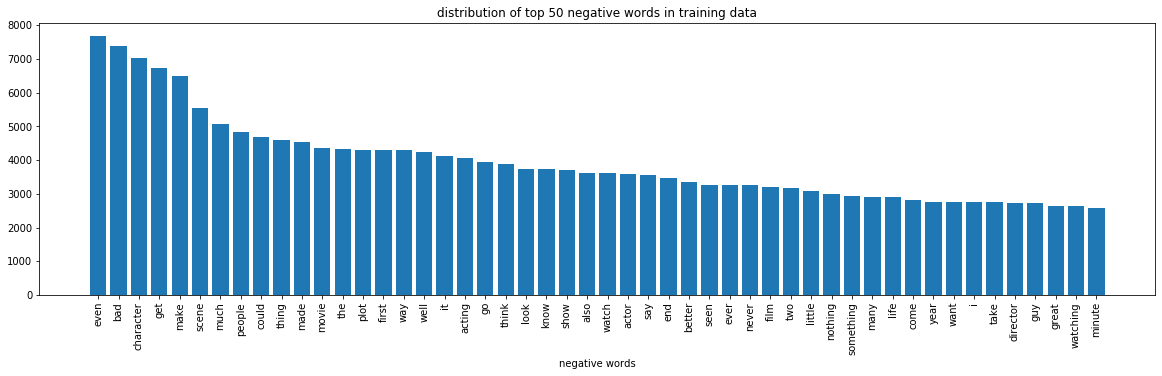

In [39]:
top50_neg_words=pd.DataFrame(Counter(" ".join(train_df[12501:]["review"]).split()).most_common(50))
plt.figure(figsize=(20,5))
plt.bar(top50_neg_words[0],top50_neg_words[1])
plt.xlabel("negative words")
plt.xticks(rotation="vertical")
plt.title("distribution of top 50 negative words in training data")

Text(0.5, 1.0, 'distribution of top 50 postive words in testing data')

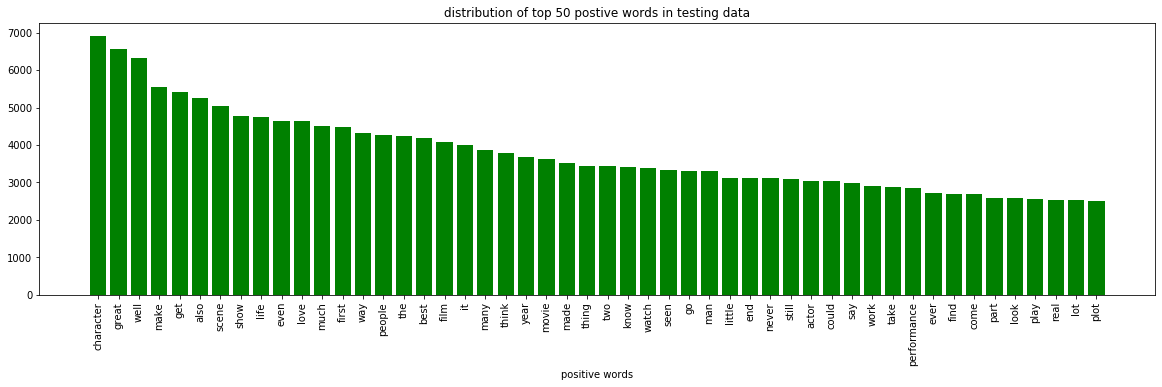

In [40]:
top50_pos_words=pd.DataFrame(Counter(" ".join(test_df[:12500]["review"]).split()).most_common(50))
plt.figure(figsize=(20,5))
plt.bar(top50_pos_words[0],top50_pos_words[1],color="green")
plt.xlabel("positive words")
plt.xticks(rotation="vertical")
plt.title("distribution of top 50 postive words in testing data")

Text(0.5, 1.0, 'distribution of top 50 negative words in testing data')

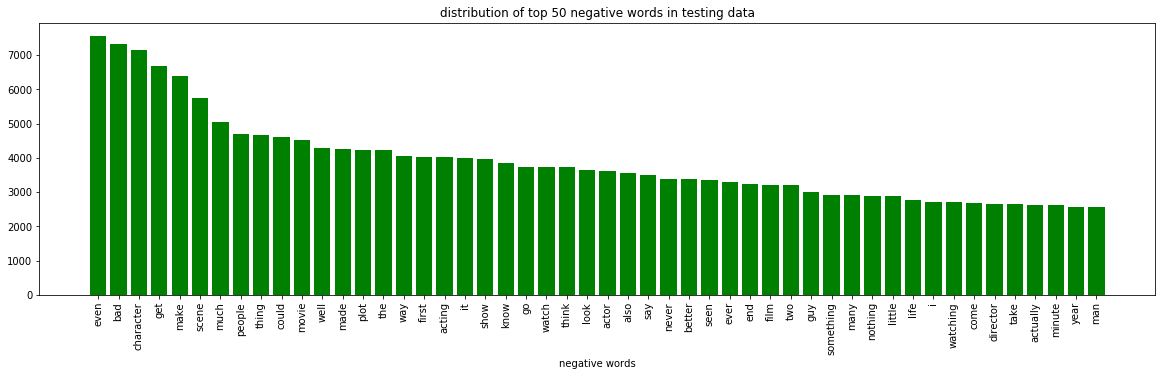

In [41]:
top50_neg_words=pd.DataFrame(Counter(" ".join(test_df[12501:]["review"]).split()).most_common(50))
plt.figure(figsize=(20,5))
plt.bar(top50_neg_words[0],top50_neg_words[1],color="green")
plt.xlabel("negative words",)
plt.xticks(rotation="vertical")
plt.title("distribution of top 50 negative words in testing data")

#  Phase 4 :  Hypothesis testing  and Feature Selection 

###  1)    Create Hypothesis involving relationships between dependent and independent variables using parametric/non-parametric tests for various machine learning algorithms such as k-means clustering,  classification algorithms.

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
train_df["label"]=le.fit_transform(train_df["label"])
train_df.head()

,review,label
0,bromwell high cartoon comedy ran program schoo...,1
1,homelessness houselessness george carlin state...,1
2,brilliant over acting lesley ann warren best d...,1
3,easily underrated inn brooks cannon sure flawe...,1
4,typical mel brooks much le slapstick movie act...,1


In [44]:
test_df["label"]=le.fit_transform(test_df["label"])
test_df.head()

,review,label
0,went saw last night coaxed friend mine admit r...,1
1,actor turned director bill paxton follows prom...,1
2,recreational golfer knowledge sport history pl...,1
3,saw sneak preview delightful cinematography un...,1
4,bill paxton taken true us golf open made much ...,1


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer("english",min_df=60)
X_train=tfidf_vectorizer.fit_transform(train_df.review)
target_train=train_df.label
X_test =tfidf_vectorizer.transform(test_df.review)
target_test=test_df.label

### Parametric tests

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [47]:
model_params = {
     'logistic_regression' : {'model': LogisticRegression(solver='liblinear',multi_class='auto'),'params': {'C': [1,5,10]}},
     'naive bayes':{'model':MultinomialNB(),'params':{}}
}

In [48]:
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,target_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_parametric= pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_parametric

,model,best_score,best_params
0,logistic_regression,0.86132,{'C': 1}
1,naive bayes,0.82804,{}


Logistic regression performs better than naive bayes.

### Non Parametric test

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [50]:
model_params = {
     'decision_tree':{'model':DecisionTreeClassifier(),'params':{'criterion':['gini','entropy']}},
     'random_forest': {'model': RandomForestClassifier(),'params' : {'n_estimators': [1,5,10]}},
     'knn': {'model': KNeighborsClassifier(),'params' : {'n_neighbors': [4,6,8]}}
}


In [51]:
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,target_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_nonparametric= pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_nonparametric

,model,best_score,best_params
0,decision_tree,0.71000,{'criterion': 'entropy'}
1,random_forest,0.76872,{'n_estimators': 10}
2,knn,0.60668,{'n_neighbors': 8}


Random forest performs better

#  Phase 5 Model Building 

### 1)  Supervised Learning: Build a sentiment analysis model to predict positive and negative classes

In [52]:
# logistic regression performs better than the other supervised models used above
lr=LogisticRegression(C=1)
lr.fit(X_train,target_train)


C:\Users\sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
lr.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1])

In [54]:
lr.score(X_test,target_test)

0.8798

###  2)  Unsupervised Learning: Build a clustering model consisting of 2 clusters based on positive and negative reviews 

In [55]:
# training set

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2,n_init=10)
k_means.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [56]:
k_means.cluster_centers_

array([[0.00033127, 0.00071055, 0.00098272, ..., 0.00089416, 0.0010025 ,
        0.00078371],
       [0.00016044, 0.00081422, 0.00018231, ..., 0.00309093, 0.00935016,
        0.0005775 ]])

In [57]:
from sklearn.decomposition import PCA
# reduce the features to 2D
pca = PCA(n_components=2,random_state=0)
reduced_features =pca.fit_transform(X_train.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(k_means.cluster_centers_)
reduced_cluster_centers

array([[-0.03728441, -0.00136975],
       [ 0.07160697,  0.00263068]])

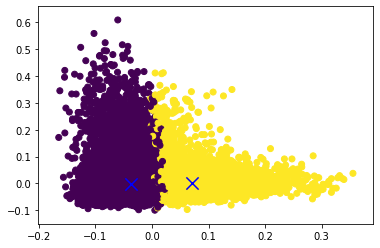

In [58]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=k_means.labels_)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [59]:
# testing set

from sklearn.cluster import KMeans
k_means_test = KMeans(n_clusters=2,n_init=10)
k_means_test.fit(X_test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
k_means_test.cluster_centers_

array([[0.00028239, 0.00062628, 0.00067339, ..., 0.00057216, 0.00086602,
        0.00066615],
       [0.00016194, 0.00098876, 0.00021526, ..., 0.00237461, 0.00541631,
        0.00060989]])

In [61]:
pca = PCA(n_components=2,random_state=0)
reduced_test_features =pca.fit_transform(X_test.toarray())

# reduce the cluster centers to 2D
reduced_test_cluster_centers = pca.transform(k_means_test.cluster_centers_)
reduced_test_cluster_centers

array([[-0.03795032,  0.00164927],
       [ 0.07010867, -0.00304682]])

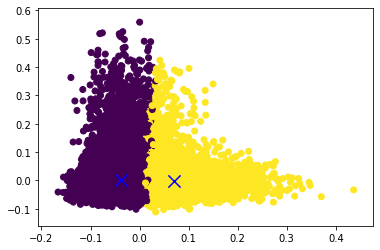

In [62]:
plt.scatter(reduced_test_features[:,0], reduced_test_features[:,1], c=k_means_test.labels_)
plt.scatter(reduced_test_cluster_centers[:, 0], reduced_test_cluster_centers[:,1], marker='x', s=150, c='b')

# Extra Credits

## Phase 1: 

###  1) Apply feature selection to select most important words/features and drop others (Bonus)

In [63]:
# training set

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_mod = TfidfVectorizer(max_features=2500)
x_train_modified=vectorizer_mod.fit_transform(train_df['review'])
train_features_selected=vectorizer_mod.get_feature_names()
target=train_df.label

In [64]:
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures = SelectKBest(score_func=chi2, k=2500)
fit = bestfeatures.fit(x_train_modified,target)

In [65]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(vectorizer_mod.get_feature_names())

In [66]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score'] 
featureScores.head()

,features,Score
0,abandoned,0.035011
1,ability,0.080042
2,able,1.792379
3,about,0.166822
4,absolute,0.818108


In [67]:
train_features_to_keep=featureScores.nlargest(2500,'Score')
train_features_to_keep.head()

,features,Score
163,bad,214.524281
2478,worst,176.391917
2402,waste,130.552343
158,awful,114.793663
954,great,97.658487


In [68]:
train_df_mod=pd.DataFrame()

In [69]:
imp_train_features=list(train_features_to_keep.features.values)
def keep_important_features(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token  in imp_train_features]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
train_df_mod['review']=train_df['review'].apply(keep_important_features)
train_df_mod["label"]=train_df["label"]
train_df_mod.head()

,review,label
0,high cartoon comedy ran program school life ye...,1
1,george issue year never plan help street consi...,1
2,brilliant over acting ann best dramatic lady e...,1
3,easily underrated sure give realistic view unl...,1
4,typical much le movie actually plot ann made f...,1


In [70]:
# testing set
vectorizer_mod = TfidfVectorizer(max_features=2500)
x_test_modified=vectorizer_mod.fit_transform(test_df['review'])
test_features_selected=vectorizer_mod.get_feature_names()
target=test_df.label

In [71]:
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures = SelectKBest(score_func=chi2, k=2500)
fit = bestfeatures.fit(x_test_modified,target)

In [72]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(vectorizer_mod.get_feature_names())

In [73]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score'] 
featureScores.head()

,features,Score
0,abandoned,0.541852
1,ability,0.706781
2,able,0.841597
3,about,0.322377
4,absolute,0.475783


In [74]:
test_features_to_keep=featureScores.nlargest(2500,'Score')
test_features_to_keep.head()

,features,Score
161,bad,213.831446
2477,worst,182.461918
954,great,123.548671
156,awful,122.458660
2403,waste,122.036762


In [75]:
test_df_mod=pd.DataFrame()
imp_test_features=list(test_features_to_keep.features.values)
def keep_important_features(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token  in imp_test_features]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
test_df_mod['review']=test_df['review'].apply(keep_important_features)
test_df_mod["label"]=test_df["label"]
test_df_mod.head()

,review,label
0,went saw last night friend mine admit knew abl...,1
1,actor turned director bill follows promising d...,1
2,knowledge sport history disney issue class ear...,1
3,saw preview delightful cinematography creative...,1
4,bill taken true us open made much extra ordina...,1


## Phase 2:

### 1) Read unlabeled data from respective folder (unsup) and store in unsup_df

In [76]:
paths=glob.glob(r"C:\Users\sony\Desktop\python\aclImdb\train\unsup/*.txt")
paths
results = defaultdict(list)
for path in paths:
    with open(path,encoding="utf-8") as topo_file:
        results["review"].append(topo_file.read())

unsup_df=pd.DataFrame(results) 
unsup_df.head()

,review
0,"I admit, the great majority of films released ..."
1,"Take a low budget, inexperienced actors doubli..."
2,"Everybody has seen 'Back To The Future,' right..."
3,Doris Day was an icon of beauty in singing and...
4,"After a series of silly, fun-loving movies, 19..."


In [77]:
unsup_df['review']=unsup_df['review'].apply(remove_stopwords)
unsup_df.head()

,review
0,"admit , great majority films released say 1933..."
1,"Take low budget , inexperienced actors doublin..."
2,"Everybody seen ' Back Future , ' right ? Wheth..."
3,Doris Day icon beauty singing acting warm voic...
4,"series silly , fun-loving movies , 1955 big ye..."


In [78]:
unsup_df['review']=unsup_df['review'].apply(denoise_text)
unsup_df.head()

,review
0,"admit , great majority films released say 1933..."
1,"Take low budget , inexperienced actors doublin..."
2,"Everybody seen ' Back Future , ' right ? Wheth..."
3,Doris Day icon beauty singing acting warm voic...
4,"series silly , fun-loving movies , 1955 big ye..."


In [79]:
unsup_df['review']=unsup_df['review'].apply(remove_special_characters)
unsup_df.head()

,review
0,admit great majority films released say ...
1,Take low budget inexperienced actors doublin...
2,Everybody seen Back Future right Wheth...
3,Doris Day icon beauty singing acting warm voic...
4,series silly fun loving movies big ye...


In [80]:
unsup_df['review']=unsup_df['review'].apply(simple_lemmatizer)
unsup_df.head()

,review
0,admit great majority film released say me doze...
1,take low budget inexperienced actor doubling p...
2,everybody seen back future right whether like ...
3,doris day icon beauty singing acting warm voic...
4,series silly fun loving movie big year doris d...


In [81]:
X_unsup=tfidf_vectorizer.fit_transform(unsup_df.review)
X_unsup

<50000x8262 sparse matrix of type '<class 'numpy.float64'>'
	with 4399852 stored elements in Compressed Sparse Row format>

### 2)  Create a cluster to separate positive and negative words (bonus) using k-means algorithm

In [82]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,n_init=10)
km.fit(X_unsup)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [83]:
km.cluster_centers_

array([[0.00017178, 0.00018971, 0.00058572, ..., 0.00041938, 0.00039766,
        0.0002348 ],
       [0.00027562, 0.00032773, 0.00073881, ..., 0.0002978 , 0.00078384,
        0.00022808]])

In [87]:
positive_cluster_center = km.cluster_centers_[0]
negative_cluster_center = km.cluster_centers_[1]

In [88]:
km.labels_

array([1, 1, 0, ..., 0, 0, 1])

##  Phase 3:

### Repeat visualization step 1 & 2 after feature selection and note the impact (Bonus)

<function matplotlib.pyplot.show(*args, **kw)>

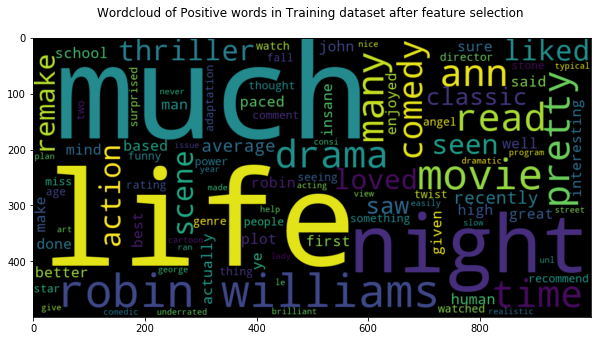

In [89]:
plt.figure(figsize=(10,10))
positive_text_mod=train_df_mod[:12500]["review"]
WC=WordCloud(width=1000,height=500,max_words=100,min_font_size=5,stopwords=STOPWORDS)
positive_words_mod=WC.generate(str(positive_text_mod))
plt.imshow(positive_words_mod,interpolation='bilinear')
plt.title("Wordcloud of Positive words in Training dataset after feature selection \n")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

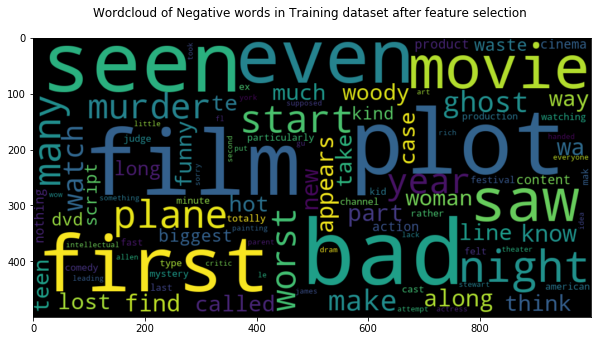

In [90]:
plt.figure(figsize=(10,10))
negative_text_mod=train_df_mod[12501:]["review"]
WC=WordCloud(width=1000,height=500,max_words=100,min_font_size=5,stopwords=STOPWORDS)
negative_words_mod=WC.generate(str(negative_text_mod))
plt.imshow(negative_words_mod,interpolation='bilinear')
plt.title("Wordcloud of Negative words in Training dataset after feature selection \n")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

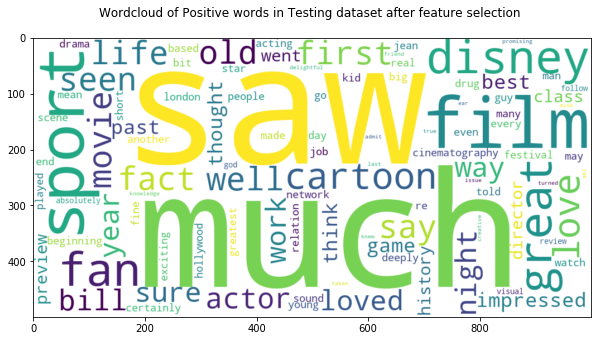

In [91]:
plt.figure(figsize=(10,10))
positive_text_mod=test_df_mod[:12500]["review"]
WC=WordCloud(width=1000,height=500,max_words=100,min_font_size=5,stopwords=STOPWORDS,background_color="white")
positive_words_mod=WC.generate(str(positive_text_mod))
plt.imshow(positive_words_mod,interpolation='bilinear')
plt.title("Wordcloud of Positive words in Testing dataset after feature selection \n")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

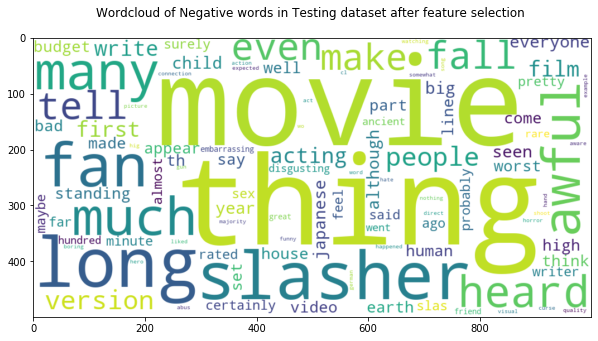

In [92]:
plt.figure(figsize=(10,10))
negative_text_mod=test_df_mod[12501:]["review"]
WC=WordCloud(width=1000,height=500,max_words=100,min_font_size=5,stopwords=STOPWORDS,background_color="white")
negative_words_mod=WC.generate(str(negative_text_mod))
plt.imshow(negative_words_mod,interpolation='bilinear')
plt.title("Wordcloud of Negative words in Testing dataset after feature selection \n")
plt.show


Text(0.5, 1.0, 'distribution of top 50 postive words in training data after feature selection')

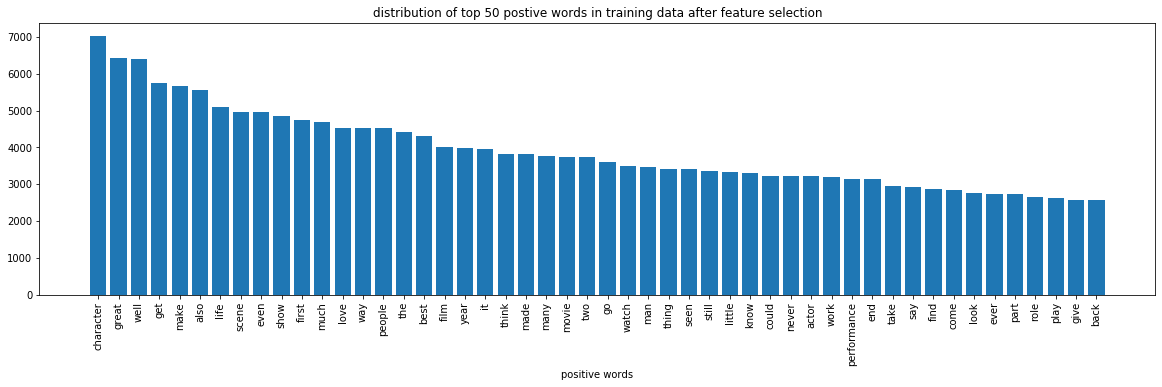

In [93]:
top50_pos_words_mod=pd.DataFrame(Counter(" ".join(train_df_mod[:12500]["review"]).split()).most_common(50))
plt.figure(figsize=(20,5))
plt.bar(top50_pos_words_mod[0],top50_pos_words_mod[1])
plt.xlabel("positive words")
plt.xticks(rotation="vertical")
plt.title("distribution of top 50 postive words in training data after feature selection")

Text(0.5, 1.0, 'distribution of top 50 negative words in training data after feature selection')

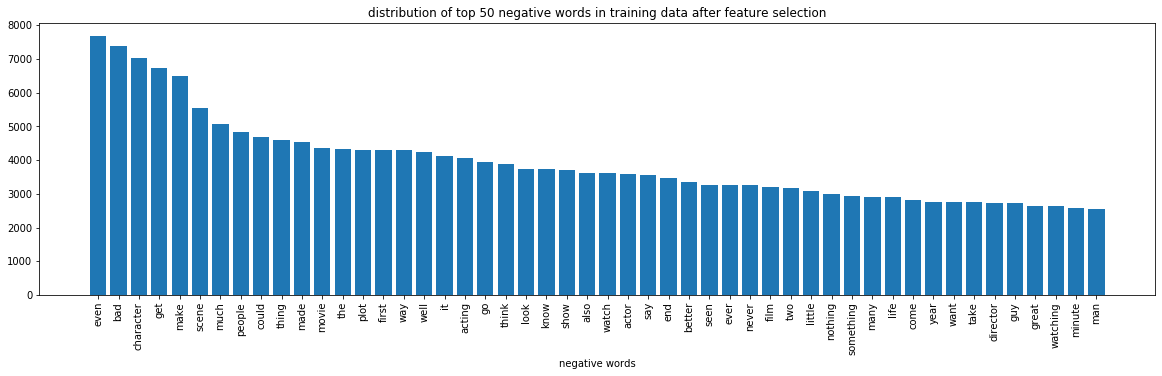

In [94]:
top50_neg_words_mod=pd.DataFrame(Counter(" ".join(train_df_mod[12500:]["review"]).split()).most_common(50))
plt.figure(figsize=(20,5))
plt.bar(top50_neg_words_mod[0],top50_neg_words_mod[1])
plt.xlabel("negative words")
plt.xticks(rotation="vertical")
plt.title("distribution of top 50 negative words in training data after feature selection")

Text(0.5, 1.0, 'distribution of top 50 postive words in testing data after feature selection')

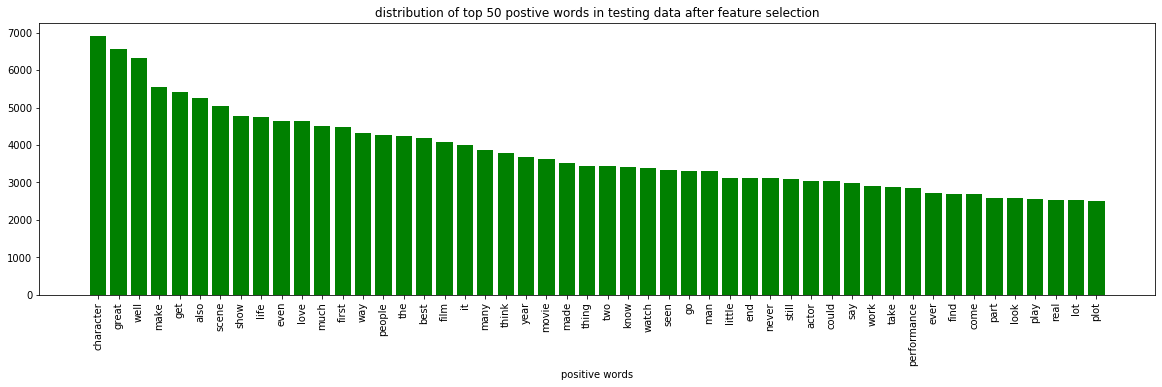

In [96]:
top50_pos_words_mod=pd.DataFrame(Counter(" ".join(test_df_mod[:12500]["review"]).split()).most_common(50))
plt.figure(figsize=(20,5))
plt.bar(top50_pos_words_mod[0],top50_pos_words_mod[1],color="green")
plt.xlabel("positive words")
plt.xticks(rotation="vertical")
plt.title("distribution of top 50 postive words in testing data after feature selection")

Text(0.5, 1.0, 'distribution of top 50 negative words in testing data after feature selection')

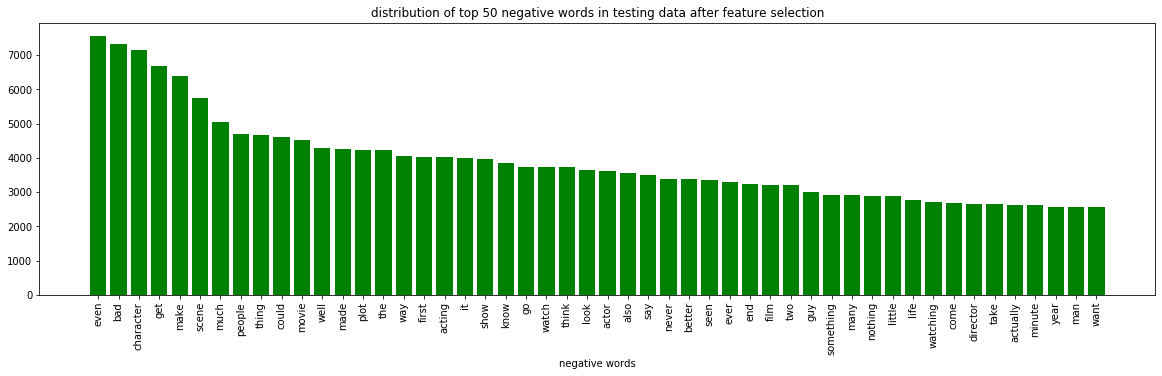

In [97]:
top50_neg_words_mod=pd.DataFrame(Counter(" ".join(test_df_mod[12500:]["review"]).split()).most_common(50))
plt.figure(figsize=(20,5))
plt.bar(top50_neg_words_mod[0],top50_neg_words_mod[1],color="green")
plt.xlabel("negative words")
plt.xticks(rotation="vertical")
plt.title("distribution of top 50 negative words in testing data after feature selection")

## Phase 5 :
### 1)   Supervised Learning: Compare the performance of different machine learning models, at least 2


In [98]:
#logistic regression after feature selection
lr.fit(x_train_modified,train_df_mod["label"])
lr.predict(x_test_modified)

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 0, 0, ..., 1, 0, 0])

In [99]:
lr.score(x_test_modified,test_df_mod["label"])

0.60392

In [100]:
#naive bayes after feature selection
nb = MultinomialNB()
nb.fit(x_train_modified,train_df_mod["label"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [101]:
nb.predict(x_test_modified)

array([1, 1, 0, ..., 1, 0, 0])

In [102]:
nb.score(x_test_modified,test_df_mod["label"])

0.59152

In [103]:
# random forest after feature selection
rf=RandomForestClassifier(criterion="entropy")
rf.fit(x_train_modified,train_df_mod["label"])

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
rf.score(x_test_modified,test_df_mod["label"])

0.59044


### 2) Unsupervised Learning: Compare the performance of different models, at least 2 


In [114]:
# k-means clustering

k_means.fit(x_train_modified)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [115]:
k_means.predict(x_test_modified)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# hierarchial clustering[:15000,:]

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward',)
cluster.fit_predict(x_train_modified.toarray())

In [ ]:
cluster.predict(x_test_modified.toarray())

### 3) Divide the data into 4 clusters to enable finding more classes. Analyse each cluster and try to find the correct label for the new cluster. Repeat clustering until 4 new labels can be found, other than the original labels (positive and negative) 


In [105]:
n_topics = 4

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=2000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(train_df.review)



### 4)  Active Learning: Cluster the training dataset and try and find the genre. Manually annotate the cluster and then try to find the labels in the new testing dataset. 

In [106]:
from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics)
cls.fit(features)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=4, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [107]:
feature_names = vec.get_feature_names()
feature_names

['ability',
 'able',
 'absolute',
 'absolutely',
 'absurd',
 'academy',
 'accent',
 'accept',
 'accident',
 'according',
 'account',
 'accurate',
 'act',
 'acted',
 'acting',
 'action',
 'actor',
 'actress',
 'actual',
 'actually',
 'adam',
 'adaptation',
 'add',
 'added',
 'addition',
 'admit',
 'adult',
 'adventure',
 'advice',
 'affair',
 'afraid',
 'africa',
 'african',
 'age',
 'aged',
 'agent',
 'ago',
 'agree',
 'ahead',
 'air',
 'al',
 'alan',
 'albert',
 'alex',
 'alien',
 'alive',
 'allen',
 'allow',
 'allowed',
 'allows',
 'amateur',
 'amateurish',
 'amazing',
 'america',
 'american',
 'americans',
 'amusing',
 'ancient',
 'anderson',
 'andy',
 'angel',
 'angle',
 'angry',
 'animal',
 'animated',
 'animation',
 'anime',
 'ann',
 'anna',
 'anne',
 'annoying',
 'answer',
 'anthony',
 'anti',
 'anybody',
 'anymore',
 'apart',
 'apartment',
 'apparent',
 'apparently',
 'appeal',
 'appealing',
 'appear',
 'appearance',
 'appeared',
 'appears',
 'appreciate',
 'approach',
 'approp

In [108]:
n_top_words = 25

In [109]:
for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 great character best performance actor role film cast scene play comedy work action excellent director love star version music better seen plot song quite book 
1 bad movie acting worst watch seen plot horror make thing watching think funny say guy better waste scene terrible awful minute know actually stupid people 
2 episode series season tv original new year book watch fan dvd character television trek watching remember best watched cartoon pilot think second sci fi batman 
3 life people woman man family love way girl year young know world make old child real thing come end little father want day war new 


So we are annotating the clusters and labelling them as:


 0: comedy
 
 1: horror
 
 2: sci fi
 
 3: drama

In [110]:
# in testing dataset
new_labels=cls.transform(vec.transform(test_df.review)).argsort(axis=1)[:,-1]

In [111]:
test_df["genre"]=new_labels
test_df.head()

,review,label,genre
0,went saw last night coaxed friend mine admit r...,1,3
1,actor turned director bill paxton follows prom...,1,3
2,recreational golfer knowledge sport history pl...,1,3
3,saw sneak preview delightful cinematography un...,1,0
4,bill paxton taken true us golf open made much ...,1,0


In [112]:
# in unsupervised dataset
new_labels_unsup=cls.transform(vec.transform(unsup_df.review)).argsort(axis=1)[:,-1]

In [113]:
unsup_df["genre"]=new_labels_unsup
unsup_df.head()

,review,genre
0,admit great majority film released say me doze...,0
1,take low budget inexperienced actor doubling p...,1
2,everybody seen back future right whether like ...,1
3,doris day icon beauty singing acting warm voic...,0
4,series silly fun loving movie big year doris d...,0
